# How many people should we ask to get a precise estimate of the mean of a binary variable?

To answer this question, we are going to use the Chernoff bound in the Sanov form: 
$$
{\begin{aligned}\Pr \left({\frac {1}{n}}\sum X_{i}\geq p+\varepsilon \right)\leq \left(\left({\frac {p}{p+\varepsilon }}\right)^{p+\varepsilon }{\left({\frac {1-p}{1-p-\varepsilon }}\right)}^{1-p-\varepsilon }\right)^{n}&=e^{-D(p+\varepsilon \|p)n}\\\Pr \left({\frac {1}{n}}\sum X_{i}\leq p-\varepsilon \right)\leq \left(\left({\frac {p}{p-\varepsilon }}\right)^{p-\varepsilon }{\left({\frac {1-p}{1-p+\varepsilon }}\right)}^{1-p+\varepsilon }\right)^{n}&=e^{-D(p-\varepsilon \|p)n}\end{aligned}}
$$

First, need to define the Kullback-Leibler divergence

In [25]:
from math import log

def DKL(x,y):
    x=min(x,0.99999);
    x=max(x,0.00001); 
    y=min(y,0.99999);
    y=max(y,0.00001);
    return x*log(x/y)+(1-x)*log((1-x)/(1-y))

If we are given the true value of $p$ it is then easy: for a given precision $\epsilon$ (here denoted tol) on $p$, with a probability at least $0.95$, we can find the value of $N$ as 

In [63]:
def returnN(ptrue,p_wrong,tol):
    DKL1=DKL(ptrue+0.01,ptrue);
    DKL2=DKL(ptrue-0.01,ptrue);
    DKLworst=min(DKL1,DKL2);    
    return -log(p_wrong/2)/DKLworst;

The problem is that we do not know the true $p$! Well, it is ok, we can try all value and plot the corresponding $N$

18443.167529298324


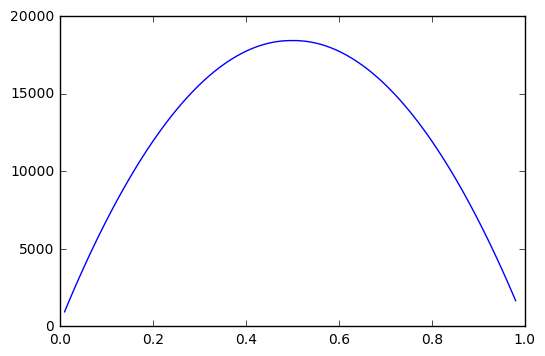

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
p = np.arange(0.01, 0.99, 0.01)
N = np.arange(0.01, 0.99, 0.01)
for i in range(np.size(p)):
    N[i]=returnN(p[i],0.05,0.01)
    
%matplotlib inline  
plt.plot(p,N)
print(returnN(0.5,0.05,0.01))

We find that the worst that can happen is then the correct value if $0.5$, and in this case the variance is the largest, and we need at least $18443$ people if we want, with probability $0.95$, to be accurate within $0.01$ on our estimate of $p$. 

Let us compare what we would have gotten with a more approximative bound. We know indeed that Bernoulli variable are Sub-Gaussian with $\sigma=1/2$ so that
$$
\Pr \left(\big|{\frac {1}{n}}\sum X_{i}-p\big|\geq \varepsilon \right)\leq 2 e^{-2n\varepsilon^2 }
$$
This gives $n=-\frac 1{2 (0.01)^2}\log{\frac{0.05}{2}} = 18444$

So this much simple computation (based on a looser bound) is already giving basically the same good answer. 

In [66]:
import random                     #Library of random numbers

num_pool=1000;
size_pool=18500;
count=0;
for i in range(num_pool):
    data=numpy.random.randint(0, 2, size_pool)
    phat=sum(data)/size_pool;
    if (abs(phat-0.5)>0.01):
        print(i," ",phat)   
        count=count+1

print("Fraction of large error:",count/num_pool)

215   0.489891891892
541   0.510702702703
741   0.513027027027
755   0.49
770   0.487837837838
776   0.511135135135
Fraction of large error: 0.006


So we see that we are certainly satisfying the criterion! In fact, it is a bit of an overkill, since we have much better results! Much better estimates can be obtains, for instance see https://arxiv.org/pdf/0707.2113.pdf and for this problem, a sample size of $n=10000$ is actually enough.